In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

## Data Analysis

In [2]:
ins = pd.read_csv('C:\\Users\\ritth\\code\\Strive\\insurance\\archive\\insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [4]:
ins['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [6]:
ins.info()    # checking null values an data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.describe()  # statistical summary of numerical columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check Null values

<AxesSubplot:title={'center':'Finding Null Values Using Heatmap'}>

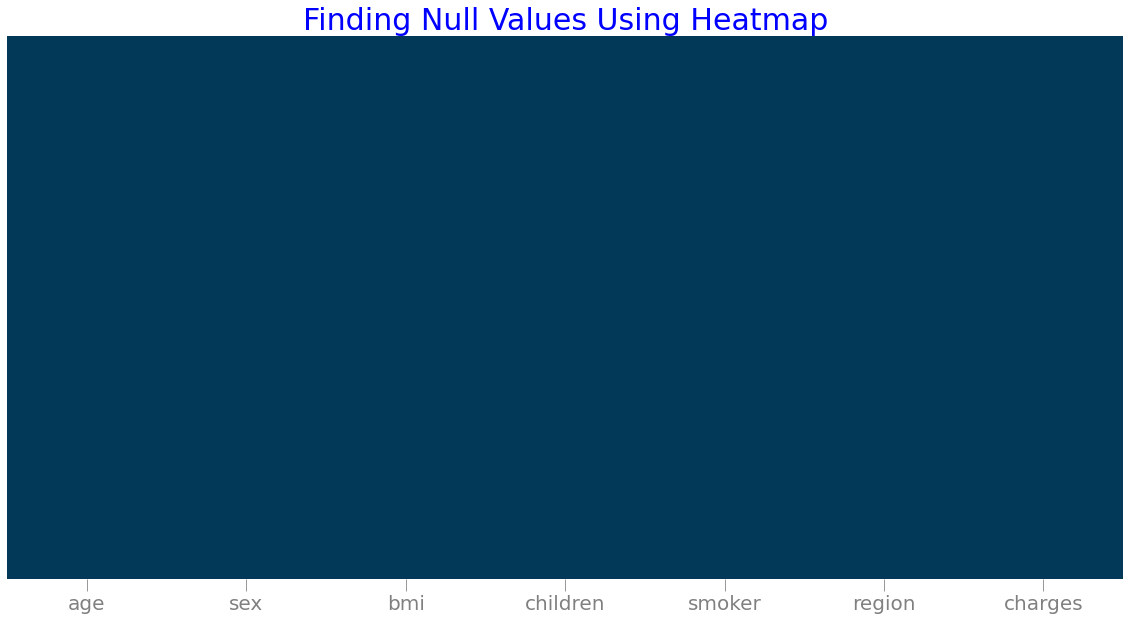

In [8]:
plt.figure(figsize= (20,10))
plt.xticks(size= 20, color="grey")
plt.tick_params(size=12, color="grey")
plt.title('Finding Null Values Using Heatmap', color='blue', size=30 )
sns.heatmap(ins.isnull(),
            yticklabels = False,
            cbar = False,
            cmap = 'PuBu_r',
            )


### Correlation

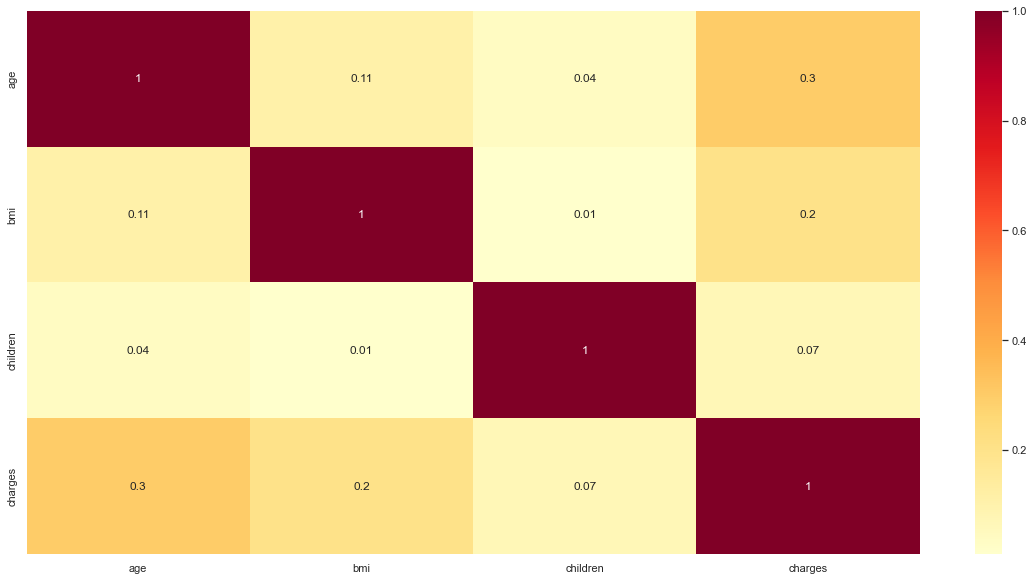

In [9]:
matrix = ins.corr().round(2)
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.show()


### Encoding

In [10]:
mapper1 = {'male':'0', 'female':'1'}
ins['sex']= ins['sex'].map(mapper1)

In [11]:
mapper2 = {'yes':'0', 'no':'1'}
ins['smoker']= ins['smoker'].map(mapper2)

In [12]:
mapper3 = {'southeast':'0', 'southwest':'1', 'northwest':'2', 'northeast':'3'}
ins['region']= ins['region'].map(mapper3)

In [13]:
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


### Split target and features

In [14]:
x = ins.drop(['charges'], axis=1)
y = ins['charges']

In [15]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [16]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## result

In [17]:
hi = x
hi

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1
